# Měření osciloskopem

In [8]:
from protokol import *
from uncertainties import ufloat as uf
import uncertainties.unumpy as unumpy
import uncertainties.umath as um

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (4*1.5,2.5*1.5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.unicode"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

In [3]:
pd.set_option("display.float_format", "{:.2g}".format)

## Definice

## Úkol 1

In [12]:
U_ef = 7.67
U_ef_err = U_ef * 0.6/100 + 0.01
U_0_mm = uf(U_ef, U_ef_err) * sp.sqrt(2)
print(U_0_mm)

10.85+/-0.08


## Úkol 2a

In [16]:
df2a = pd.read_csv("../raw/u2a.txt", delim_whitespace=True)
df2a.head()

,C,U
0,1e-10,3.3
1,1e-08,3.3
2,2e-08,3.5
3,3e-08,3.9
4,4e-08,4.2


In [18]:
df2a["C_chyba"] = df2a.C * 0.01
df2a.head()

,C,U,C_chyba
0,1e-10,3.3,1e-12
1,1e-08,3.3,1e-10
2,2e-08,3.5,2e-10
3,3e-08,3.9,3e-10
4,4e-08,4.2,4e-10


In [21]:
df2a["U_chyba"] = 0.2
df2a.U_chyba[17:] = 0.1
df2a.U_chyba[4:14] = 0.3
df2a

,C,U,C_chyba,U_chyba
0,1e-10,3.3,1e-12,0.2
1,1e-08,3.3,1e-10,0.2
2,2e-08,3.5,2e-10,0.2
3,3e-08,3.9,3e-10,0.2
4,4e-08,4.2,4e-10,0.3
5,5e-08,4.5,5e-10,0.3
6,6e-08,4.9,6e-10,0.3
7,7e-08,5.2,7e-10,0.3
8,8e-08,5.3,8e-10,0.3
9,9e-08,5.7,9e-10,0.3


In [92]:
def f(x, a, b, c):
    return a*x*x*x + b*x*x + c*x + d

params, err = fit(f, df2a.C.values, df2a.U.values)


C:\tools\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


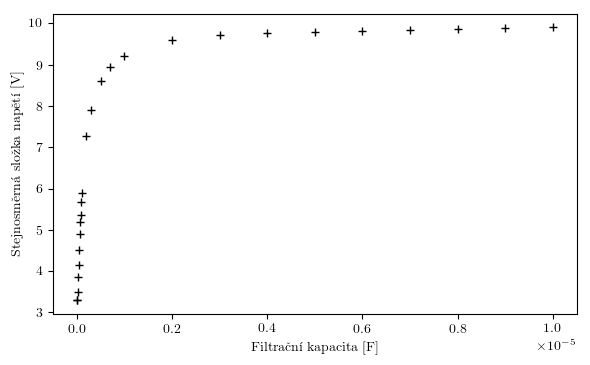

In [99]:
fig, axes = plt.subplots()
axes.set_ylabel("Stejnosměrná složka napětí [V]")
axes.set_xlabel("Filtrační kapacita [F]")
axes.ticklabel_format(style="sci", scilimits=(0, 1000))
axes.plot(df2a.C, df2a.U, "k+")
fig.tight_layout()
fig.savefig("../plot/u2a.pdf")

## Úkol 2b

In [40]:
df2b = pd.read_csv("../raw/u2b.txt", delim_whitespace=True)
df2b

,I,C
0,9.5e-05,1.5e-06
1,0.00011,1.7e-06
2,0.00012,1.9e-06
3,0.00014,2.1e-06
4,0.00015,2.4e-06
5,0.00019,2.9e-06
6,0.00023,3.6e-06
7,0.00031,4.8e-06
8,0.00045,7.1e-06
9,0.00056,9.2e-06


In [41]:
df2b["I_chyba"] = 1e-5
df2b["C_chyba"] = df2b.C * 0.01

In [42]:
df2b

,I,C,I_chyba,C_chyba
0,9.5e-05,1.5e-06,1e-05,1.5e-08
1,0.00011,1.7e-06,1e-05,1.7e-08
2,0.00012,1.9e-06,1e-05,1.9e-08
3,0.00014,2.1e-06,1e-05,2.1e-08
4,0.00015,2.4e-06,1e-05,2.4e-08
5,0.00019,2.9e-06,1e-05,2.9e-08
6,0.00023,3.6e-06,1e-05,3.6e-08
7,0.00031,4.8e-06,1e-05,4.8e-08
8,0.00045,7.1e-06,1e-05,7.1e-08
9,0.00056,9.2e-06,1e-05,9.2e-08


In [51]:
def f(x, a, b):
    return a*x + b

params, err = fit(f, df2b.I.values, df2b.C.values)

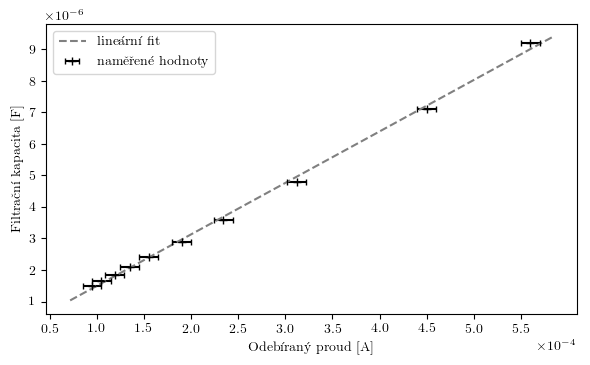

In [59]:
fig, axes = plt.subplots()
axes.ticklabel_format(style='sci', scilimits=(0,0))
axes.set_ylabel("Filtrační kapacita [F]")
axes.set_xlabel("Odebíraný proud [A]")
axes.set_xticks(sp.arange(0,6e-4,5e-5))
axes.set_yticks(sp.arange(0,9.9999e-6,1e-6))
axes.plot(*curve(df2b.I.values, f, params), "gray", linestyle="--", label="lineární fit")
axes.errorbar(df2b.I, df2b.C, xerr = df2b.I_chyba, capsize=2, linestyle="none", marker="+", c="k", label="naměřené hodnoty")
axes.legend()
fig.tight_layout()
fig.savefig("../plot/u2b.pdf")

## Pokusy